# Python code for simulating the motion of a single pendulum
**Raktim Bhattacharya**<br>
*AERO 310* <br> 
Aerospace Engineering, Texas A&M University

The motion of the point-mass pendulum is described by a second-order nonlinear differential equation
$$
\ddot{\theta} = -\frac{g}{l}\sin(\theta).
$$

This is converted to a system of first-order (nonlinear) ordinary differential equations:
$$
\begin{align}
\dot{x}_1 = x_2, && \ddot{x}_2 = -\frac{g}{l}\sin(x_1),
\end{align}
$$
where $x_1 := \theta$, and $x_2 := \dot{\theta}$.

In [6]:
from scipy.integrate import solve_ivp
from numpy import pi, sin, cos, linspace

def pendulumDynamics(t, x):
    g = 9.806
    l = 1
    x1 = x[0]
    x2 = x[1]

    x1dot = x2
    x2dot = -(g/l)*sin(x1) # angles are in radians
    return [x1dot,x2dot]

# Define initial conditions, etc
d2r = pi/180
x0 = [90*d2r, 0] # start from 90 deg, with zero velocity
t0 = 0
tf = 10

# Integrate dynamics, initial value problem
sol = solve_ivp(pendulumDynamics,[t0,tf],x0,dense_output=True) # Save as a continuous solution

t = linspace(t0,tf, 200) # determine solution at these times
dt = t[1]-t[0]
x = sol.sol(t)

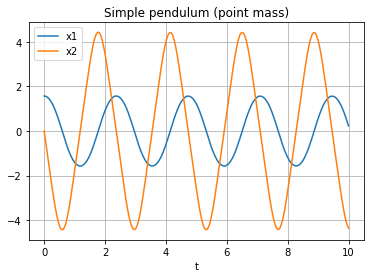

In [7]:
# Plot the trajectories
import matplotlib.pyplot as plt

plt.plot(t, x.T)
plt.xlabel('t')
plt.title('Simple pendulum (point mass)')
plt.legend(['x1','x2'])
plt.grid('on')
plt.show()

In [8]:
# Do some animation
from matplotlib.animation import FuncAnimation, PillowWriter
plt.rcParams["animation.html"] = "html5"

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 1))
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

posX = sin(x.T[:,0])
posY = cos(x.T[:,0])

def init():
    line.set_data([], [])
    return line,

def animate(i):
    global posX, posY

    thisx = [0, posX[i]]
    thisy = [0, -posY[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text,

# Create animation
ani = FuncAnimation(fig, animate,init_func=init,frames=len(t)-1,interval=50,blit=True)
plt.close(fig) # Don't want to see the static image frames

# Save the animation to a .gif file
writergif = PillowWriter(fps=30)
ani.save('pendulum.gif', writergif)


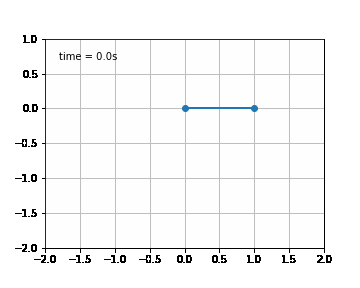

In [9]:
from IPython.display import Image
with open('pendulum.gif','rb') as file:
    display(Image(file.read()))

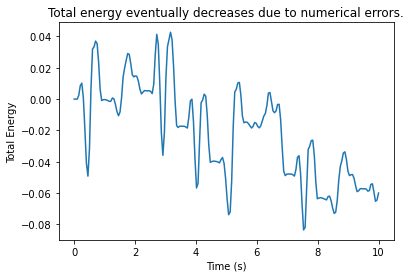

In [10]:
# Compute energy of the system
l = 1;
m = 1;
g = 9.806

vel = l*x.T[:,1] # compute vel magnitude of particle = l*thetadot 
E =  0.5*m*vel**2 - m*g*posY;
plt.plot(t,E);
plt.xlabel('Time (s)')
plt.ylabel('Total Energy')
plt.title('Total energy eventually decreases due to numerical errors.');